In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
X=df[['TV','radio','newspaper']]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [3]:
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta

b,theta=initialize(3)
print("Bias: “,b,”Weights: ",theta)

Bias: “,b,”Weights:  [0.79729764 0.20262418 0.35944653]


In [4]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([ 2.17163438,  0.07074507,  0.30670459,  1.31287227,  1.16706687,
        0.36278708, -0.25373682, -0.04801766, -1.49818936,  0.61763269])

In [5]:
import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.5796186174135677

In [6]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.5640914878085505 theta:  [0.79729764 0.20262418 0.35944653]
After first update -Bias:  0.5528096580523795 theta:  [0.79637148 0.20665629 0.35451008]


0.5796186174135677

In [7]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
    print('Final Estimate of b and theta : ',b,theta)
    return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.219569943099476 [0.34018807 0.32666108 0.26817897]


In [8]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,0.706288
1,10.0,0.684531
2,20.0,0.663577
3,30.0,0.643397
4,40.0,0.623960
5,50.0,0.605239
6,60.0,0.587208
7,70.0,0.569839
8,80.0,0.553109
9,90.0,0.536993


Text(0, 0.5, 'Cost or MSE')

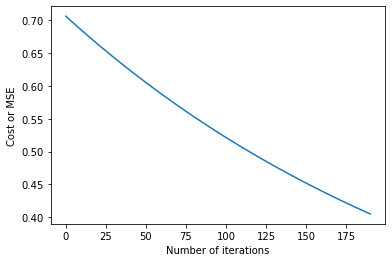

In [9]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

Final Estimate of b and theta :  2.776829399660624e-16 [ 0.75306591  0.53648155 -0.00433069]
Final Estimate of b and theta :  0.006209821398577153 [0.74646588 0.48638033 0.04860708]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

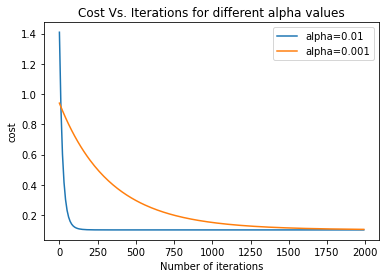

In [10]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')